In [1]:
# Import packages for later use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# Encode numerical data
numerical_features = train_data.dtypes[train_data.dtypes != 'object'].index.values
numerical_data = train_data[numerical_features]
test_set = test_data[[n for n in numerical_features if n != 'SalePrice']]

In [3]:
omit = ['SalePrice', 'Id']
numerical_data.fillna(0, inplace=True)
test_set.fillna(0, inplace=True)
X = numerical_data[[n for n in numerical_features if n not in omit]]
T = test_set[[n for n in numerical_features if n not in omit]]
y = train_data['SalePrice']

In [4]:
not np.any(np.isnan(X)) and np.all(np.isfinite(X))

True

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [18]:
pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [19]:
print(lin_reg.intercept_)
print(len(lin_reg.coef_))
coef = pd.DataFrame(lin_reg.coef_, [n for n in numerical_features if n not in omit], columns=['Coefficient'])
coef

181311.22180996437
36


,Coefficient
MSSubClass,-8.491574e+03
LotFrontage,-5.913932e+02
LotArea,4.377750e+03
OverallQual,2.502683e+04
OverallCond,4.080312e+03
YearBuilt,9.878024e+03
YearRemodAdd,3.092604e+03
MasVnrArea,3.068575e+03
BsmtFinSF1,-1.544543e+16
BsmtFinSF2,-5.077517e+15


In [20]:
pred = lin_reg.predict(X_test)
pred

array([147100.22180996, 309121.72180996, 118274.22180996, 182041.22180996,
       304681.22180996,  64781.22180996, 232093.22180996, 149566.22180996,
        62701.22180996, 147506.22180996, 152011.22180996, 110859.22180996,
        89817.22180996, 208777.22180996, 190134.22180996, 137398.22180996,
       210568.22180996, 131513.22180996, 115446.22180996, 230247.22180996,
       185975.22180996, 212283.22180996, 190931.22180996, 130343.22180996,
       209721.22180996, 148224.22180996, 195349.22180996,  91533.22180996,
       182537.22180996, 176281.22180996, 115406.22180996, 278895.22180996,
       242919.22180996,  84746.22180996, 274715.22180996, 156793.22180996,
       144007.22180996, 214938.22180996, 308439.22180996,  88055.22180996,
       134853.22180996, 248803.22180996,  99077.22180996, 278661.22180996,
       133685.22180996, 121703.22180996, 102269.22180996, 124225.22180996,
       360828.22180996, 125195.22180996, 102249.22180996, 218249.22180996,
        86810.22180996, 3

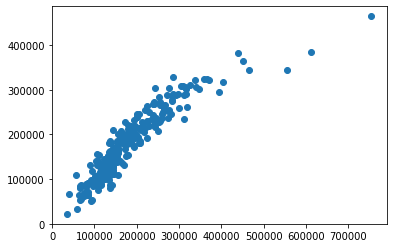

In [9]:
plt.scatter(y_test, pred)

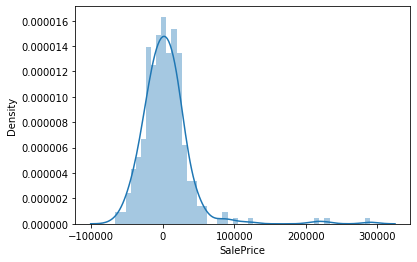

In [10]:
sns.distplot((y_test - pred), bins=50);

In [11]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 22178.969863296894
MSE: 1299687349.5721853
RMSE: 36051.17681258388
R2 Square 0.8305564438244656
Train set evaluation:
_____________________________________
MAE: 20881.35855880087
MSE: 1137614139.9660788
RMSE: 33728.535989071315
R2 Square 0.8092707635055887


In [21]:
pipe = Pipeline([('std_scalar', StandardScaler())])
X = pipe.fit_transform(X)
T = pipe.transform(T)
model = LinearRegression(normalize=True)
model.fit(X, y)
predictions = model.predict(T)
predictions

array([119501.20936158, 152686.57265613, 172963.20152968, ...,
       179793.64225167, 118995.4880547 , 258072.91141186])

In [22]:
print(model.intercept_)
print(len(model.coef_))
coefficients = pd.DataFrame(model.coef_, [n for n in numerical_features if n not in omit], columns=['Coefficient'])
coefficients

180921.59582707743
36


,Coefficient
MSSubClass,-7.051008e+03
LotFrontage,3.132591e+02
LotArea,3.925999e+03
OverallQual,2.392711e+04
OverallCond,5.684771e+03
YearBuilt,1.022539e+04
YearRemodAdd,2.529566e+03
MasVnrArea,5.097926e+03
BsmtFinSF1,4.504351e+15
BsmtFinSF2,1.593163e+15


In [23]:
test_data['SalePrice'] = predictions
submission = test_data[[r for r in test_data if r in omit]]

In [24]:
submission

,Id,SalePrice
0,1461,119501.209362
1,1462,152686.572656
2,1463,172963.201530
3,1464,200277.197577
4,1465,195013.573085
...,...,...
1454,2915,75377.539782
1455,2916,60962.176096
1456,2917,179793.642252
1457,2918,118995.488055


In [25]:
submission.to_csv('./teamJarvis2.csv', index=False)